# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Normalize-by-population" data-toc-modified-id="Normalize-by-population-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Normalize by population</a></div><div class="lev3 toc-item"><a href="#Make-a-combined-DF" data-toc-modified-id="Make-a-combined-DF-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Make a combined DF</a></div>

A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

In [109]:
%matplotlib inline

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

from jhu_helpers import *

In [111]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [112]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [113]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Belgium,Austria,Norway,Sweden,Portugal,Brazil,Denmark,Canada
Date,,,,,,,,,,,,,,,,,,,
2020-03-18,81102,35713,7783,13910,12327,17361,9105,8413,3028,2642,2058,1486,1646,1550,1279,448,372,1116,657
2020-03-19,81156,41035,13677,17963,15320,18407,10947,8565,4075,2716,2467,1795,2013,1746,1439,785,621,1225,800
2020-03-20,81250,47021,19100,20410,19848,19644,12726,8652,5294,4014,3003,2257,2388,1914,1639,1020,793,1337,943
2020-03-21,81305,53578,25489,25374,22213,20610,14431,8799,6575,5067,3640,2815,2814,2118,1763,1280,1021,1420,1278
2020-03-22,81397,59138,33272,28768,24873,21638,16176,8897,7245,5741,4216,3401,3244,2383,1934,1600,1593,1514,1465


In [114]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    'Singapore', 
    'US',
    'France',
    'Germany',
    'Spain',
]

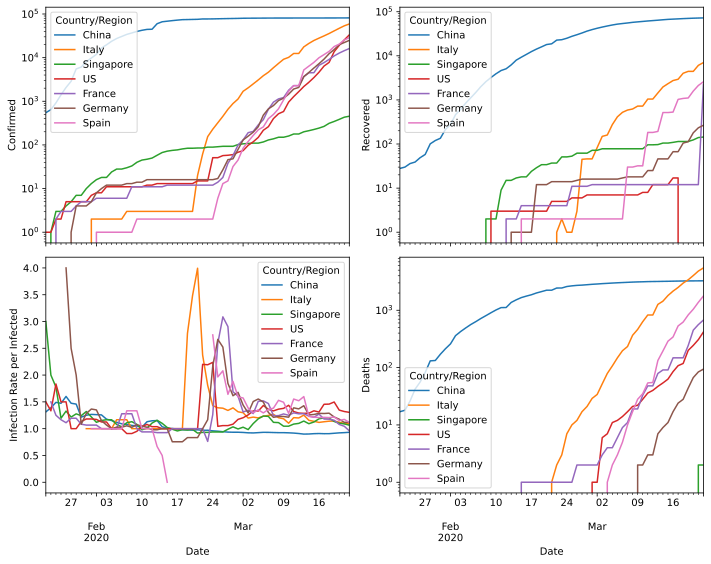

In [115]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed')

smooth_rate_d = 3
jhu.infection_rate[plot_countries].rolling(smooth_rate_d, center=True, min_periods=1).mean().plot(ax=ax1[1,0], logy=False)
ax1[1,0].set_ylabel('Infection Rate per Infected')

jhu.recovered[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Recovered')

jhu.deaths[plot_countries].plot(ax=ax1[1,1], logy=True)
ax1[1,1].set_ylabel('Deaths')

fig1.tight_layout()

In [116]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')

In [117]:
## Scratch

In [118]:
set(jhu.columns.get_level_values(0))

{'confirmed', 'deaths', 'infected', 'infection_rate', 'recovered'}

In [119]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    "Iran",
    #'Singapore', 
    'US',
    'Korea, South',
    'France',
    'Germany',
    'Spain',
]

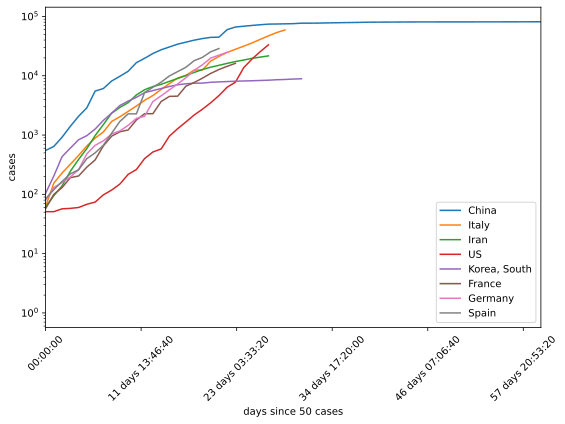

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
confirmed_thres = 50

for country in plot_countries:
    confirmed = jhu.confirmed[country]
    index_after_thres_cross = confirmed[confirmed>confirmed_thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

xmin, xmax = ax.get_xlim()
ax.set_xlim(0, xmax)

ax.set_xlabel('days since 50 cases')
ax.set_ylabel('cases')


fig.tight_layout()

fig.savefig('cases.pdf')

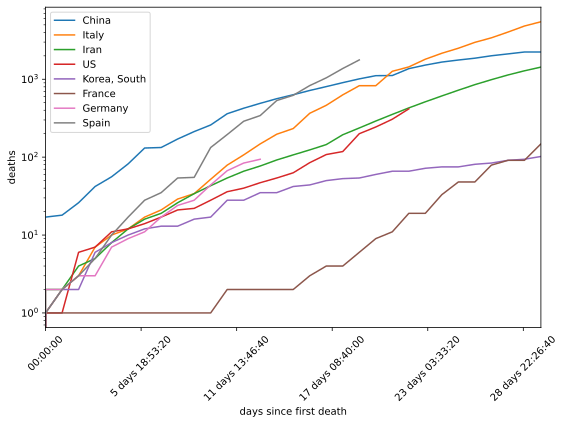

In [121]:
fig, ax = plt.subplots(figsize=(8,6))
thres = 0

for country in plot_countries:
    confirmed = jhu.deaths[country]
    if len(confirmed[confirmed>thres]) == 0:
        continue
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

ax.set_xlabel('days since first death')
ax.set_ylabel('deaths')

ax.set_xlim(0, ax.get_xlim()[1]/2)
fig.tight_layout()

## Normalize by population

In [122]:
wikipedia_populations = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')[0]

populations_dict = {row['Country (or dependent territory)']:row['Population'] for idx,row in wikipedia_populations.iterrows()}

In [123]:
populations_dict['US'] =  populations_dict['United States[c]']

In [124]:
populations_dict['China']=populations_dict['China[b]']
populations_dict['Korea, South']=populations_dict['South Korea']
populations_dict['France'] = populations_dict['France[e]']

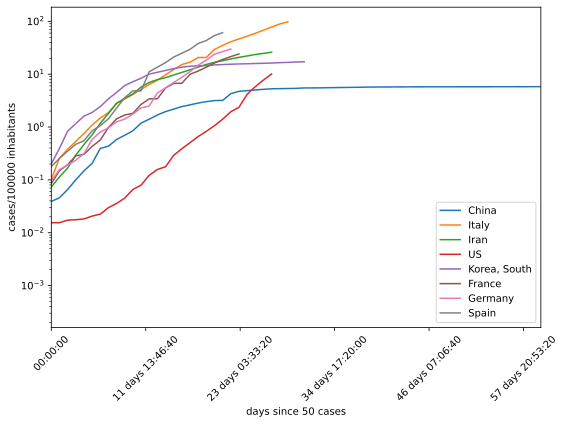

In [125]:
fig, ax = plt.subplots(figsize=(8,6))
confirmed_thres = 50

for country in plot_countries:
    population = populations_dict[country]
    confirmed = jhu.confirmed[country]
    index_after_thres_cross = confirmed[confirmed>confirmed_thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed*=(100000/population)
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

xmin, xmax = ax.get_xlim()
ax.set_xlim(0, xmax)

ax.set_xlabel('days since 50 cases')
ax.set_ylabel('cases/100000 inhabitants')


fig.tight_layout()

fig.savefig('cases_normalized.pdf')

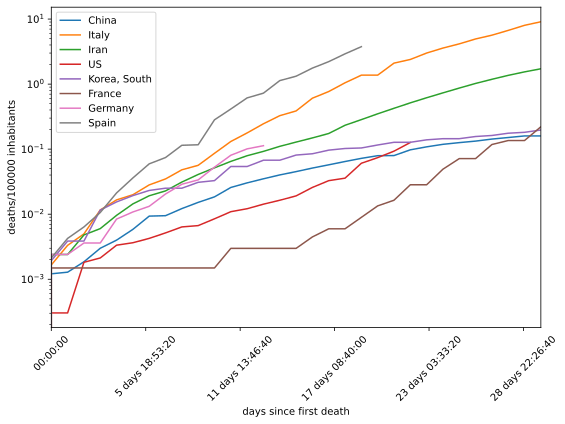

In [126]:
fig, ax = plt.subplots(figsize=(8,6))
thres = 0

for country in plot_countries:
    population = populations_dict[country]

    confirmed = jhu.deaths[country]
    if len(confirmed[confirmed>thres]) == 0:
        continue
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed*=(100000/population)
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

ax.set_xlabel('days since first death')
ax.set_ylabel('deaths/100000 inhabitants')

ax.set_xlim(0, ax.get_xlim()[1]/2)
fig.tight_layout()

### Make a combined DF

In [127]:
selected_countries = ['China', 'Iran', 'Italy', 'Germany']

In [128]:
for country in plot_countries:
    population = populations_dict[country]

    confirmed = jhu.deaths[country]
    if len(confirmed[confirmed>thres]) == 0:
        continue
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed*=(100000/population)
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()

In [140]:
#narrow_df.sort_values(by='Meldedatum', inplace=True)

cumsum_dfs = []

for country in selected_countries:
    population = populations_dict[country]
    # first cases
    confirmed = jhu.confirmed[country]
    if len(confirmed[confirmed>50]) == 0:
        pass
    index_after_thres_cross = confirmed[confirmed>50].index[0]
    
    cases_df = confirmed.reset_index(name='cases')
    cases_df['days_since_50_cases'] = (cases_df['Date'] - index_after_thres_cross)/pd.Timedelta(days=1)
    cases_df = cases_df.set_index("Date")
    
    deaths = jhu.deaths[country]
    if len(deaths[deaths>0]) == 0:
        pass
    index_after_thres_cross = deaths[deaths>0].index[0]
    
    deaths_df = deaths.reset_index(name='deaths')
    deaths_df['days_since_first_death'] = (deaths_df['Date'] - index_after_thres_cross)/pd.Timedelta(days=1)
    deaths_df = deaths_df.set_index("Date")
    
    country_df = cases_df.join(deaths_df, how='outer')
    
    country_df['cumulative_deaths'] = country_df['deaths'].cumsum()
    country_df['cumulative_cases'] = country_df['cases'].cumsum()
    
    country_df['cumulative_deaths_normed'] = country_df['cumulative_deaths']/population*100000
    country_df['cumulative_cases_normed'] = country_df['cumulative_cases']/population*100000
    country_df = country_df.reset_index('Date')
    country_df.rename({'Date': 'date'}, axis='columns', inplace=True)
    country_df['country'] = country
    cumsum_dfs.append(country_df)
    
all_countries_df = pd.concat(cumsum_dfs)

In [141]:
all_countries_df

,date,cases,days_since_50_cases,deaths,days_since_first_death,cumulative_deaths,cumulative_cases,cumulative_deaths_normed,cumulative_cases_normed,country
0,2020-01-22,548,0.0,17,0.0,17,548,0.001213,0.039090,China
1,2020-01-23,643,1.0,18,1.0,35,1191,0.002497,0.084957,China
2,2020-01-24,920,2.0,26,2.0,61,2111,0.004351,0.150583,China
3,2020-01-25,1406,3.0,42,3.0,103,3517,0.007347,0.250877,China
4,2020-01-26,2075,4.0,56,4.0,159,5592,0.011342,0.398892,China
...,...,...,...,...,...,...,...,...,...,...
56,2020-03-18,12327,18.0,28,9.0,106,53847,0.127482,64.759415,Germany
57,2020-03-19,15320,19.0,44,10.0,150,69167,0.180398,83.184104,Germany
58,2020-03-20,19848,20.0,67,11.0,217,89015,0.260976,107.054419,Germany
59,2020-03-21,22213,21.0,84,12.0,301,111228,0.361999,133.769015,Germany


In [142]:
all_countries_df.to_hdf('all_countries_data.h5', key='data')

In [143]:
all_countries_df.dtypes

date                        datetime64[ns]
cases                                int64
days_since_50_cases                float64
deaths                               int64
days_since_first_death             float64
cumulative_deaths                    int64
cumulative_cases                     int64
cumulative_deaths_normed           float64
cumulative_cases_normed            float64
country                             object
dtype: object

In [144]:
all_countries_df[all_countries_df['country']=='Germany']

,date,cases,days_since_50_cases,deaths,days_since_first_death,cumulative_deaths,cumulative_cases,cumulative_deaths_normed,cumulative_cases_normed,country
0,2020-01-22,0,-38.0,0,-47.0,0,0,0.000000,0.000000,Germany
1,2020-01-23,0,-37.0,0,-46.0,0,0,0.000000,0.000000,Germany
2,2020-01-24,0,-36.0,0,-45.0,0,0,0.000000,0.000000,Germany
3,2020-01-25,0,-35.0,0,-44.0,0,0,0.000000,0.000000,Germany
4,2020-01-26,0,-34.0,0,-43.0,0,0,0.000000,0.000000,Germany
...,...,...,...,...,...,...,...,...,...,...
56,2020-03-18,12327,18.0,28,9.0,106,53847,0.127482,64.759415,Germany
57,2020-03-19,15320,19.0,44,10.0,150,69167,0.180398,83.184104,Germany
58,2020-03-20,19848,20.0,67,11.0,217,89015,0.260976,107.054419,Germany
59,2020-03-21,22213,21.0,84,12.0,301,111228,0.361999,133.769015,Germany


In [155]:
deaths = jhu.deaths['Germany']
deaths.name='deaths'

cases = jhu.confirmed['Germany']
cases.name='cases'

sel = pd.concat([deaths, cases], axis=1)
sel[-20:]

,deaths,cases
Date,,
2020-03-03,0,196
2020-03-04,0,262
2020-03-05,0,482
2020-03-06,0,670
2020-03-07,0,799
2020-03-08,0,1040
2020-03-09,2,1176
2020-03-10,2,1457
2020-03-11,3,1908


In [156]:
sel.diff()[-15:]

,deaths,cases
Date,,
2020-03-08,0.0,241.0
2020-03-09,2.0,136.0
2020-03-10,0.0,281.0
2020-03-11,1.0,451.0
2020-03-12,0.0,170.0
2020-03-13,4.0,1597.0
2020-03-14,2.0,910.0
2020-03-15,2.0,1210.0
2020-03-16,6.0,1477.0


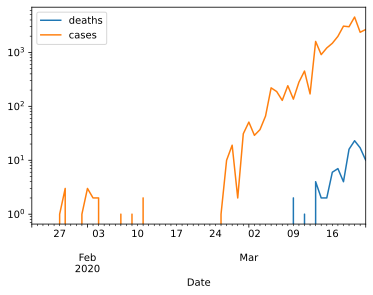

In [160]:
sel.diff().plot()
ax = plt.gca()

#ax.set_xlim(18400, 18343)
ax.set_yscale('log')